In [1]:
import visual_behavior_glm.GLM_visualization_tools as gvt
import visual_behavior_glm.GLM_analysis_tools as gat
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
%matplotlib notebook
%widescreen

applied a custom magic command to make full use of screen width
will only work if command is defined locally
replace with the following to replicate functionality: 
	from IPython.core.display import display, HTML
	display(HTML("<style>.container { width:100% !important; }</style>")


## results from running the GLM are cached in a mongo database. 

In [3]:
results = gat.retrieve_results()

### reconcile the different column names 'Full_avg_cv_var_test' and 'Full__avg_cv_var_test'

In [4]:
for idx,row in results.iterrows():
    for tt in ['train','test']:
        if pd.isnull(row['Full_avg_cv_var_{}'.format(tt)]) and pd.notnull(row['Full__avg_cv_var_{}'.format(tt)]):
            results.at[idx,'Full_avg_cv_var_{}'.format(tt)] = row['Full__avg_cv_var_{}'.format(tt)]

In [5]:
results['glm_version'].unique()

array(['3', '4_L2_optimize_by_session', '4_L2_fixed_lambda=1',
       '4_L2_optimize_by_cell', '2', '4_L2_opt_by_cell_tighter_grid',
       '4_L2_opt_by_session_tighter_grid', '5_L2_fixed_lambda=1',
       '5_L2_optimize_by_cell', '5_L2_optimize_by_session', '1',
       '6_L2_optimize_by_session', '6_L2_optimize_by_cell',
       '7_L2_optimize_by_session', '8a_L2_optimize_by_session',
       '8b_L2_optimize_by_session', '9d_L2_optimize_by_session',
       '9a_L2_optimize_by_session', '9c_L2_optimize_by_session',
       '9b_L2_optimize_by_session'], dtype=object)

## Now plot variance explained for the versions that have been run as a batch

<IPython.core.display.Javascript object>


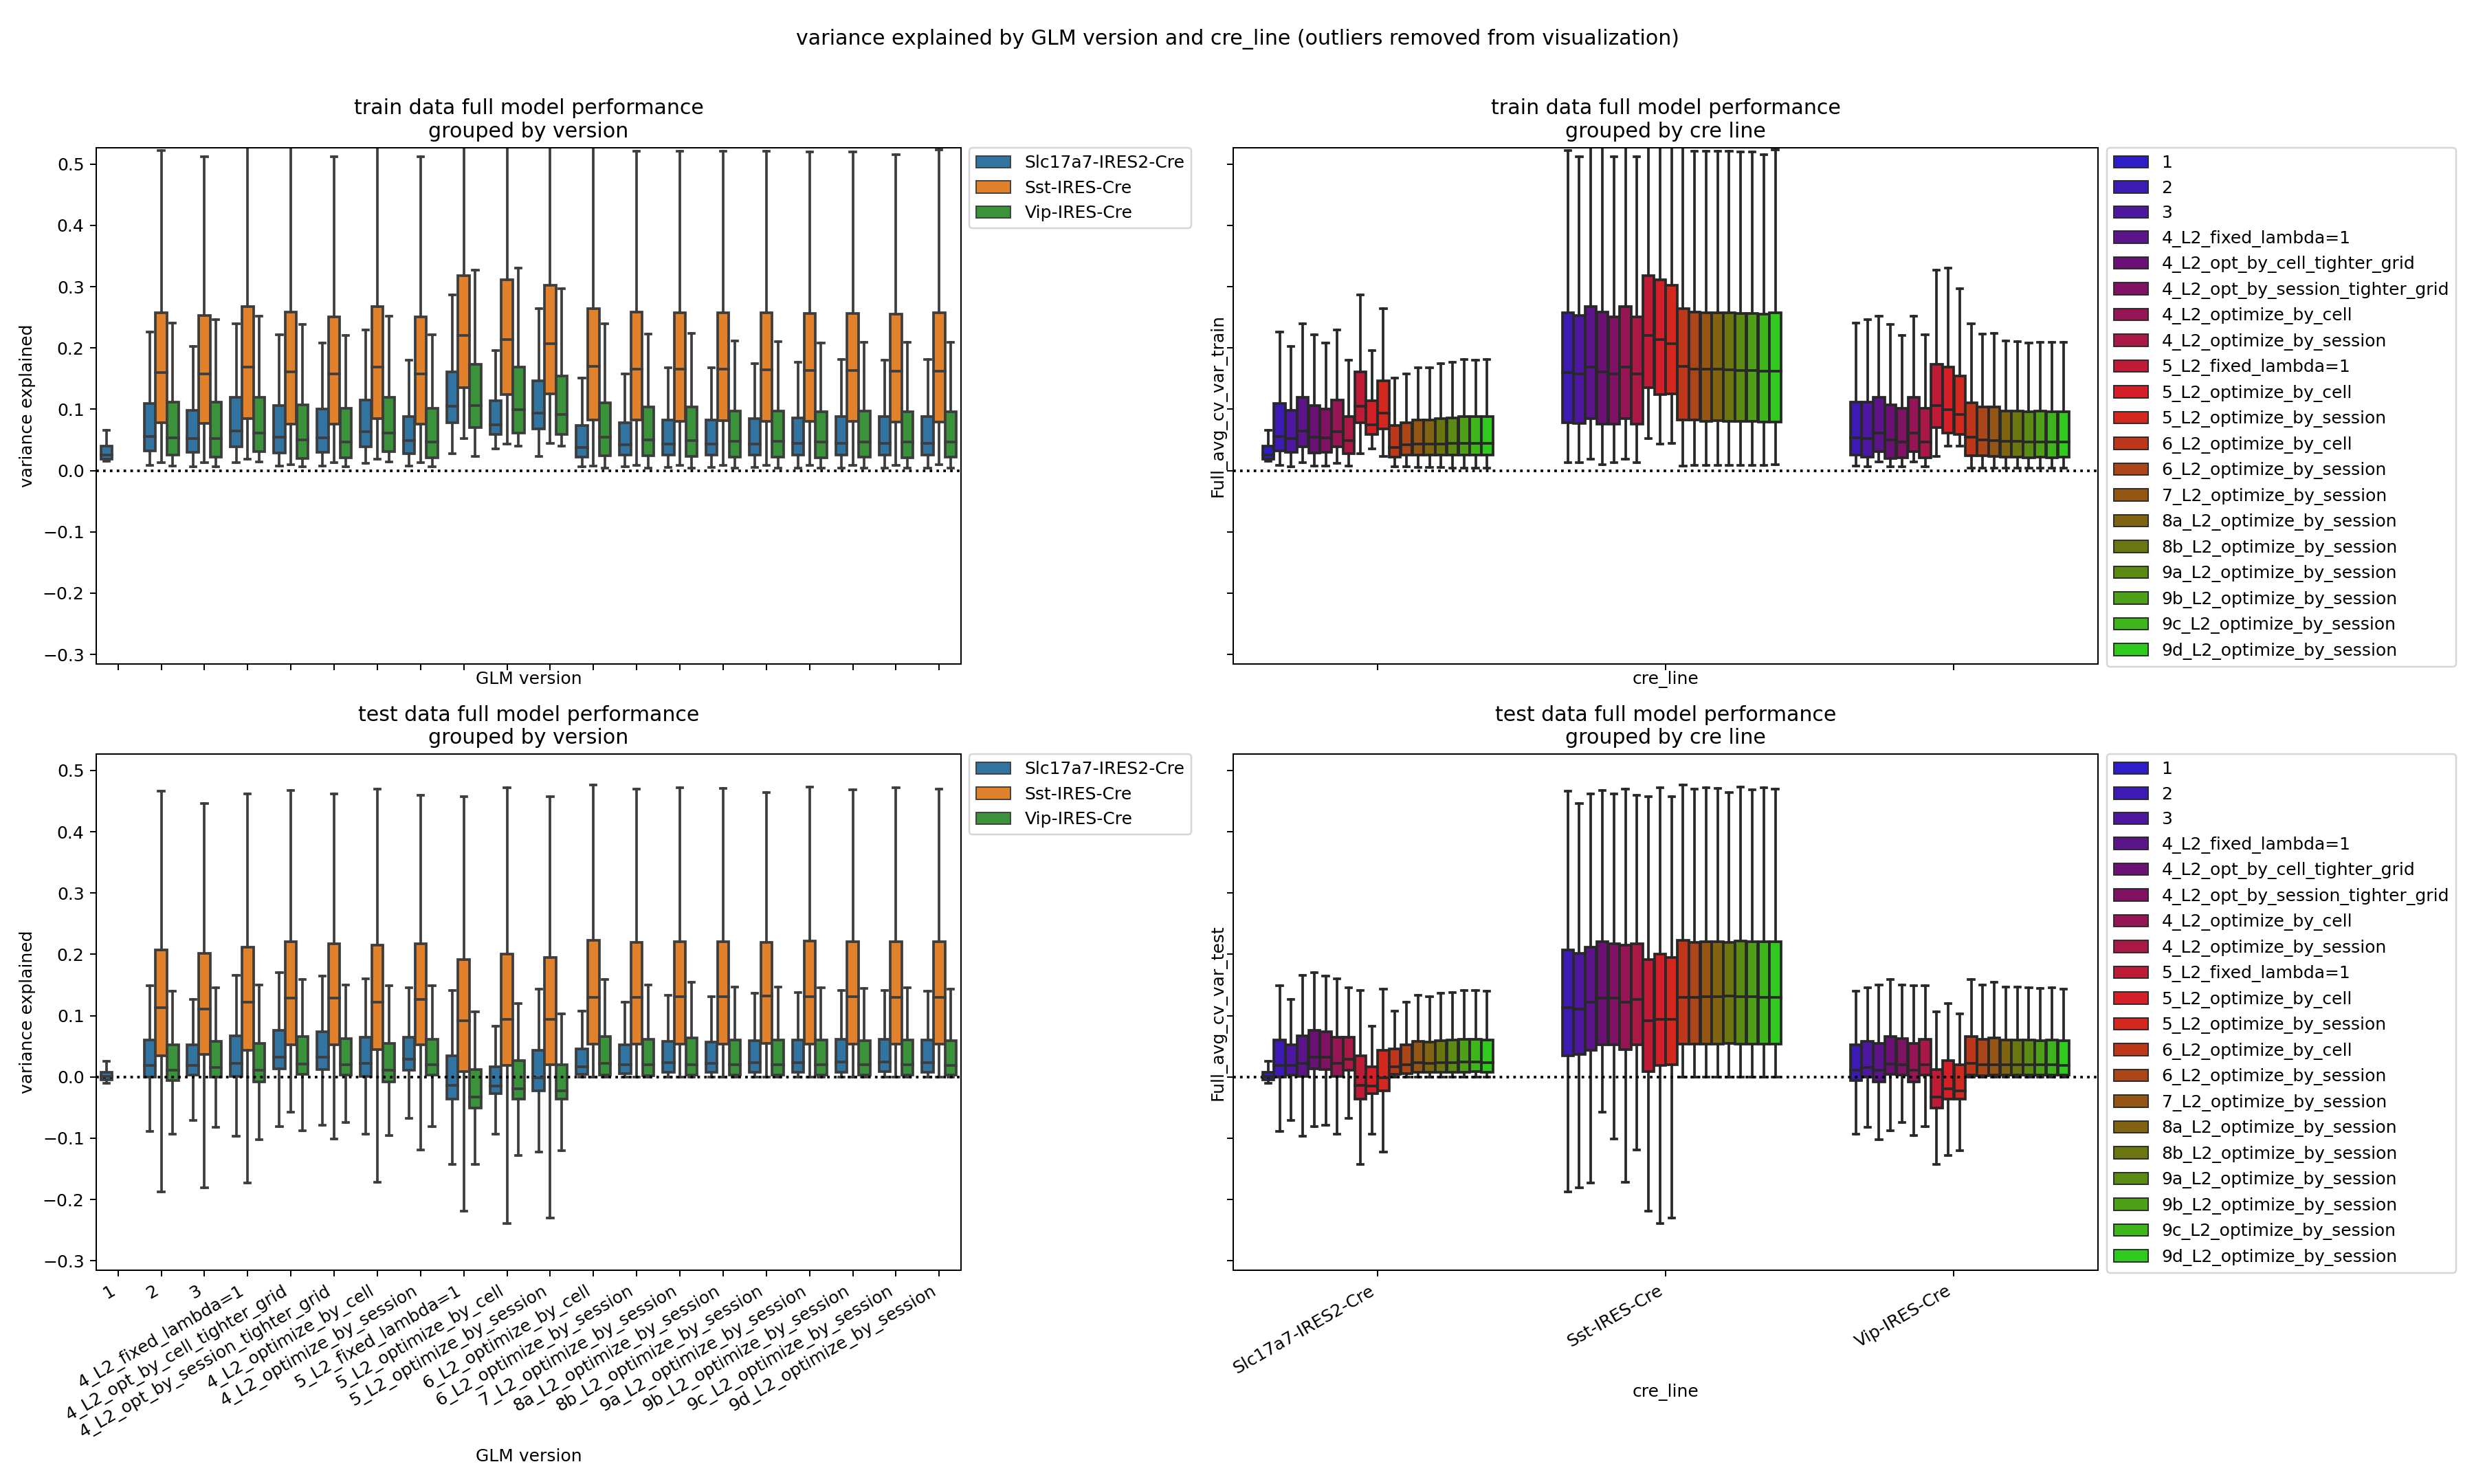

In [7]:
fig, ax = gvt.compare_var_explained(results[results['glm_version']!='test_fixed_lambda=50'].dropna(subset=['cre_line']), figsize=(20,12))

## get median variance explained for each version/cre-line

In [ ]:
results_summary = results.groupby(['glm_version','cre_line'])['Full_avg_cv_var_test'].describe()
results_summary

In [ ]:
glm_versions = ['6_L2_optimize_by_session','7_L2_optimize_by_session']
results_subset = results.query('glm_version in @glm_versions').copy()
def make_identifier(row):
    return '{}_{}'.format(row['ophys_experiment_id'],row['cell_specimen_id'])
results_subset['identifier'] = results_subset.apply(make_identifier, axis=1)

In [ ]:
pivoted_results = results_subset.pivot(index='identifier', columns='glm_version',values='Full_avg_cv_var_test')
cols= [col for col in results_subset.columns if col not in pivoted_results.columns and 'test' not in col and 'train' not in col and '__' not in col and 'dropout' not in col]

In [ ]:
cols

In [ ]:
results_subset[cols]

In [ ]:
df = pivoted_results.merge(
    results_subset[cols],
    left_on='identifier',
    right_on='identifier',
    how='left'
)
df

In [ ]:
sns.jointplot(
    data = df,
    x='6_L2_optimize_by_session',
    y='7_L2_optimize_by_session',
    hue='cre_line',
    hue_order=np.sort(df['cre_line'].unique()),
    alpha=0.15
)